# Lab: Customer Analysis Round 2

In [48]:
import pandas as pd
import numpy as np
from scipy import stats 
pd.set_option('display.max_columns', None)
import warnings #to ignore the warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv("marketing_customer_analysis.csv")
df1.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [3]:
df1.shape

(10910, 26)

In [4]:
df1_new_cols = [df1.columns[i].lower().replace(' ', '_') for i in range(len(df1.columns))]

df1_new_cols

['unnamed:_0',
 'customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

In [5]:
df1_new_cols.index('employmentstatus')

8

In [6]:
df1_new_cols[8] = 'employment_status'

df1.columns = df1_new_cols

df1 = df1.drop(columns = ['unnamed:_0'])

df1

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10279 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10279 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employment_status              10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

In [8]:
df1.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employment_status                   0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [9]:
cols_categorical_nan = ['state', 'response', 'vehicle_class', 'vehicle_size', 'vehicle_type']

df1[cols_categorical_nan] = df1[cols_categorical_nan].fillna("unknown")

df1.isna().sum()

customer                           0
state                              0
customer_lifetime_value            0
response                           0
coverage                           0
education                          0
effective_to_date                  0
employment_status                  0
gender                             0
income                             0
location_code                      0
marital_status                     0
monthly_premium_auto               0
months_since_last_claim          633
months_since_policy_inception      0
number_of_open_complaints        633
number_of_policies                 0
policy_type                        0
policy                             0
renew_offer_type                   0
sales_channel                      0
total_claim_amount                 0
vehicle_class                      0
vehicle_size                       0
vehicle_type                       0
dtype: int64

In [10]:
cols_numerical_nan = ['months_since_last_claim', 'number_of_open_complaints']
df1[cols_numerical_nan].head()

,months_since_last_claim,number_of_open_complaints
0,7.0,0.0
1,3.0,0.0
2,34.0,0.0
3,10.0,0.0
4,NaN,NaN


In [11]:
months_since_last_claim_mean = df1['months_since_last_claim'].mean()

number_of_open_complaints_mean = df1['number_of_open_complaints'].mean()

In [12]:
df1['months_since_last_claim'] = df1['months_since_last_claim'].fillna(months_since_last_claim_mean)

df1['number_of_open_complaints'] = df1['number_of_open_complaints'].fillna(number_of_open_complaints_mean)

df1.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

In [13]:
df1['effective_to_date'] = pd.to_datetime(df1['effective_to_date'], format='%m/%d/%y')

In [14]:
df1['effective_to_date_month'] = df1['effective_to_date'].dt.month

df1.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.000000,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,unknown,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.000000,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.000000,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.000000,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,15.149071,31,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown,1


In [15]:
df1 = df1[df1["effective_to_date_month"] < 4]

df1.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.000000,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,unknown,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.000000,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.000000,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.000000,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,15.149071,31,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown,1


# Lab: Customer Analysis Round 3

In [16]:
df1.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.000000,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,unknown,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.000000,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.000000,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.000000,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,15.149071,31,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown,1


#### Show DataFrame info

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10910 non-null  object        
 2   customer_lifetime_value        10910 non-null  float64       
 3   response                       10910 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective_to_date              10910 non-null  datetime64[ns]
 7   employment_status              10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location_code                  10910 non-null  object        
 11  marital_status 

#### Describe DataFrame

In [18]:
df1.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date_month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.466728
std,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556,0.498915
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


#### Show a plot of the total number of responses.

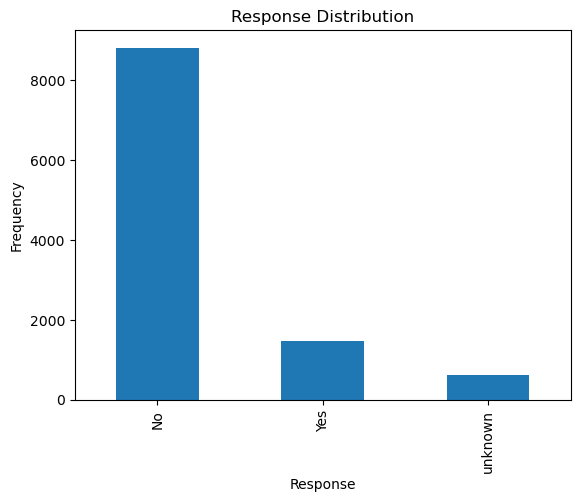

In [19]:
response_counts = df1['response'].value_counts()
response_counts.plot.bar()
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.title('Response Distribution')
plt.show()

#### Show a plot of the response rate by the sales channel.

In [20]:
value_counts = df1.groupby(['sales_channel', 'response'])['response'].count()

result_dict = value_counts.to_dict()

print(value_counts)

sales_channel  response
Agent          No          3148
               Yes          742
               unknown      231
Branch         No          2539
               Yes          326
               unknown      157
Call Center    No          1792
               Yes          221
               unknown      128
Web            No          1334
               Yes          177
               unknown      115
Name: response, dtype: int64


In [21]:
channel_response_rates = {}
for channel, response in value_counts.keys():
    if response == 'Yes':
        channel_response_rates[channel] = value_counts[(channel, response)] / sum(
            [value_counts[(channel, 'Yes')], value_counts[(channel, 'No')], value_counts[(channel, 'unknown')]]
        )

print(channel_response_rates)

{'Agent': 0.1800533851007037, 'Branch': 0.10787557908669755, 'Call Center': 0.10322279308734236, 'Web': 0.1088560885608856}


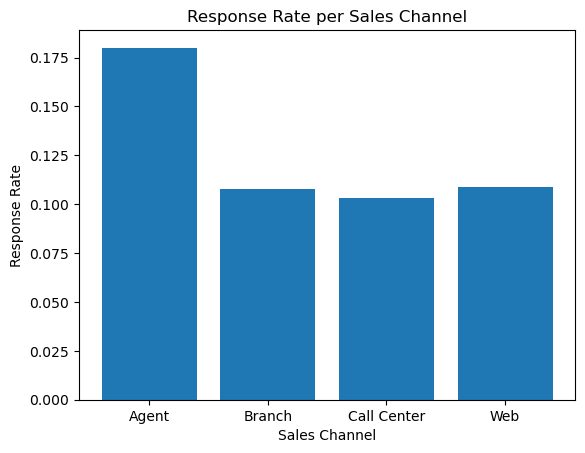

In [22]:
plt.bar(channel_response_rates.keys(), channel_response_rates.values())
plt.xlabel('Sales Channel')
plt.ylabel('Response Rate')
plt.title('Response Rate per Sales Channel')
plt.show()

#### Show a plot of the response rate by the total claim amount.

In [23]:
df1_copy = df1.copy()
df1_copy['claim_amounts_bin'] = pd.cut(df1_copy['total_claim_amount'], bins=5)
value_counts = df1_copy.groupby(['claim_amounts_bin', 'response'])['response'].count().to_dict()
value_counts

{(Interval(-2.794, 578.727, closed='right'), 'No'): 6885,
 (Interval(-2.794, 578.727, closed='right'), 'Yes'): 1201,
 (Interval(-2.794, 578.727, closed='right'), 'unknown'): 509,
 (Interval(578.727, 1157.355, closed='right'), 'No'): 1665,
 (Interval(578.727, 1157.355, closed='right'), 'Yes'): 226,
 (Interval(578.727, 1157.355, closed='right'), 'unknown'): 106,
 (Interval(1157.355, 1735.983, closed='right'), 'No'): 213,
 (Interval(1157.355, 1735.983, closed='right'), 'Yes'): 39,
 (Interval(1157.355, 1735.983, closed='right'), 'unknown'): 11,
 (Interval(1735.983, 2314.612, closed='right'), 'No'): 43,
 (Interval(1735.983, 2314.612, closed='right'), 'Yes'): 0,
 (Interval(1735.983, 2314.612, closed='right'), 'unknown'): 5,
 (Interval(2314.612, 2893.24, closed='right'), 'No'): 7,
 (Interval(2314.612, 2893.24, closed='right'), 'Yes'): 0,
 (Interval(2314.612, 2893.24, closed='right'), 'unknown'): 0}

In [24]:
claima_response_rates = {}
for claima, response in value_counts.keys():
     if response == 'Yes':
        claima_response_rates[claima] = value_counts[(claima, response)] / sum(
            [value_counts[(claima, 'Yes')], value_counts[(claima, 'No')], value_counts[(claima, 'unknown')]]
        )

claima_response_rates

{Interval(-2.794, 578.727, closed='right'): 0.13973240255962768,
 Interval(578.727, 1157.355, closed='right'): 0.11316975463194792,
 Interval(1157.355, 1735.983, closed='right'): 0.1482889733840304,
 Interval(1735.983, 2314.612, closed='right'): 0.0,
 Interval(2314.612, 2893.24, closed='right'): 0.0}

In [25]:
claima_bin_labels = []

for claima_labels in claima_response_rates.keys():
    claima_bin_labels.append(str(claima_labels))

claima_bin_labels

['(-2.794, 578.727]',
 '(578.727, 1157.355]',
 '(1157.355, 1735.983]',
 '(1735.983, 2314.612]',
 '(2314.612, 2893.24]']

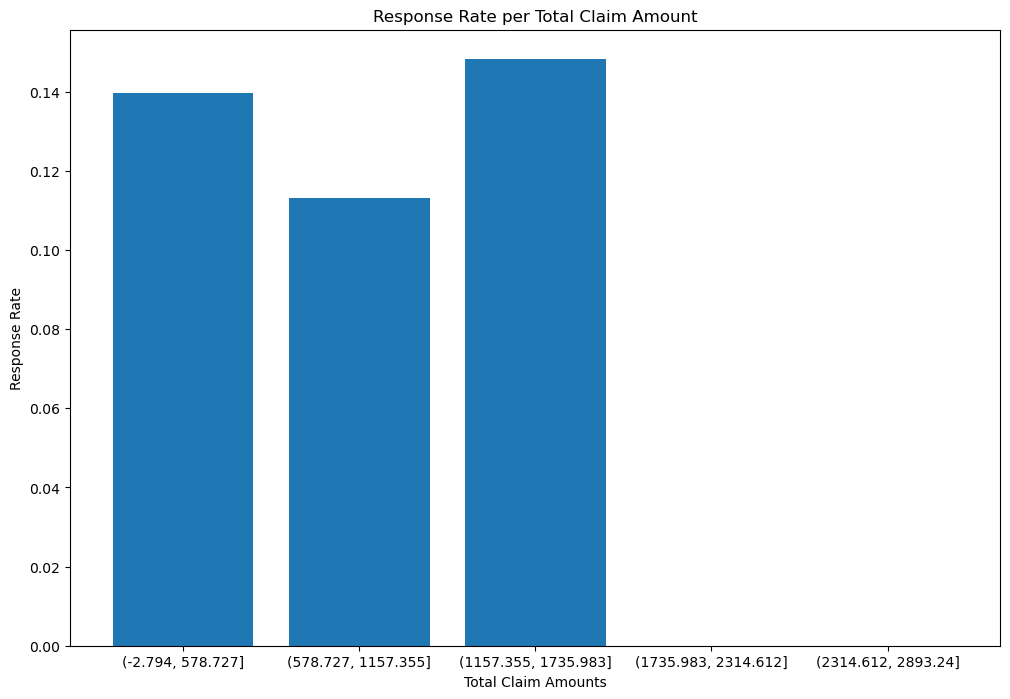

In [26]:
fig = plt.figure(figsize=(12, 8))
fig = plt.bar(claima_bin_labels, claima_response_rates.values())
plt.xlabel('Total Claim Amounts')
plt.ylabel('Response Rate')
plt.title('Response Rate per Total Claim Amount')
plt.show()

#### Show a plot of the response rate by income.

In [27]:
df1_copy['income_bin'] = pd.cut(df1_copy['income'], bins=5)

value_counts1 = df1_copy.groupby(['income_bin', 'response'])['response'].count().to_dict()

value_counts1

{(Interval(-99.981, 19996.2, closed='right'), 'No'): 2814,
 (Interval(-99.981, 19996.2, closed='right'), 'Yes'): 406,
 (Interval(-99.981, 19996.2, closed='right'), 'unknown'): 199,
 (Interval(19996.2, 39992.4, closed='right'), 'No'): 2096,
 (Interval(19996.2, 39992.4, closed='right'), 'Yes'): 455,
 (Interval(19996.2, 39992.4, closed='right'), 'unknown'): 151,
 (Interval(39992.4, 59988.6, closed='right'), 'No'): 1501,
 (Interval(39992.4, 59988.6, closed='right'), 'Yes'): 222,
 (Interval(39992.4, 59988.6, closed='right'), 'unknown'): 96,
 (Interval(59988.6, 79984.8, closed='right'), 'No'): 1388,
 (Interval(59988.6, 79984.8, closed='right'), 'Yes'): 258,
 (Interval(59988.6, 79984.8, closed='right'), 'unknown'): 119,
 (Interval(79984.8, 99981.0, closed='right'), 'No'): 1014,
 (Interval(79984.8, 99981.0, closed='right'), 'Yes'): 125,
 (Interval(79984.8, 99981.0, closed='right'), 'unknown'): 66}

In [28]:
income_response_rates = {}
for income, response in value_counts1.keys():
    if response == 'Yes':
        yes_count = value_counts1.get((income, 'Yes'), 0)
        no_count = value_counts1.get((income, 'No'), 0)
        unknown_count = value_counts1.get((income, 'unknown'), 0)
        income_response_rates[income] = yes_count / (yes_count + no_count + unknown_count)

income_bin_labels = []

for income_labels in income_response_rates.keys():
    income_bin_labels.append(str(income_labels))

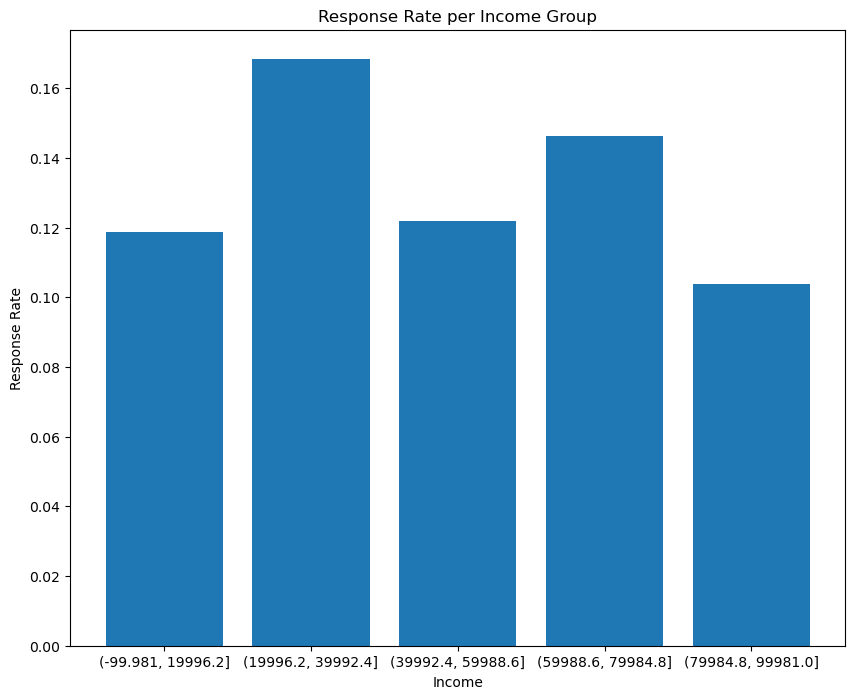

In [29]:
fig = plt.figure(figsize=(10, 8))
fig = plt.bar(income_bin_labels, income_response_rates.values())
plt.xlabel('Income')
plt.ylabel('Response Rate')
plt.title('Response Rate per Income Group')
plt.show()

# Lab: Customer Analysis Round 4

### Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [30]:
print(df1.dtypes)

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [31]:
numerical = pd.DataFrame(df1.select_dtypes(include=[np.number]))
categorical = pd.DataFrame(df1.select_dtypes(include=[np.object]))

In [32]:
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date_month
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1


In [33]:
categorical.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,unknown
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,unknown
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,unknown


### Now we will try to check the normality of the numerical variables visually

   #### - Do the distributions for different numerical variables look like a normal distribution?

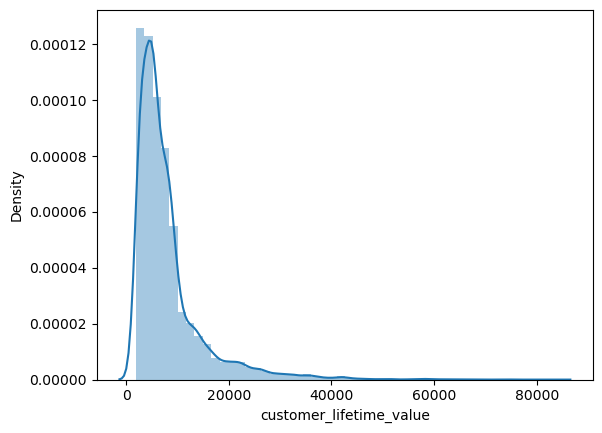

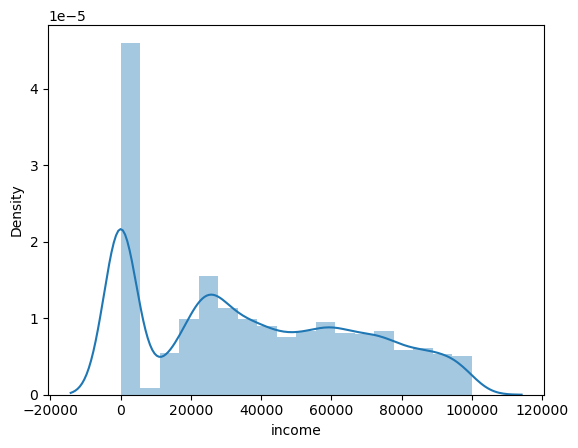

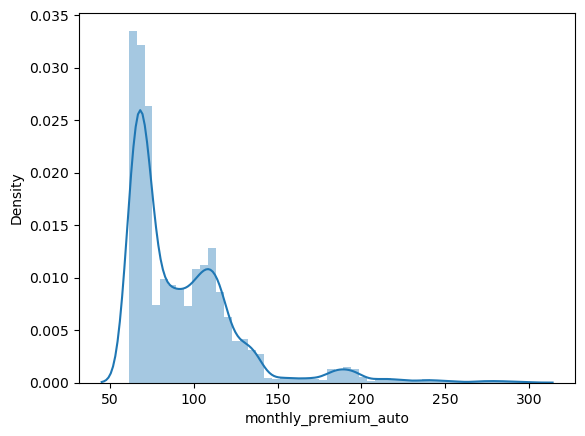

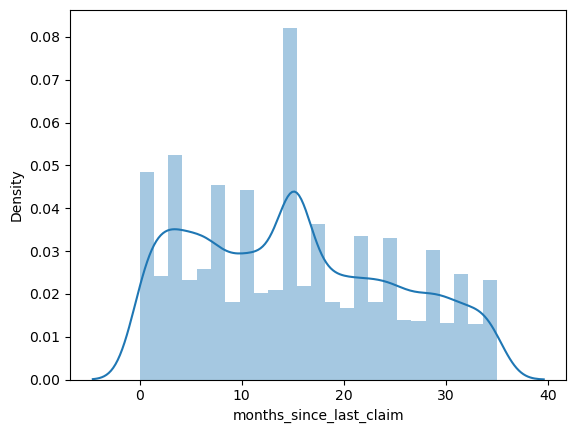

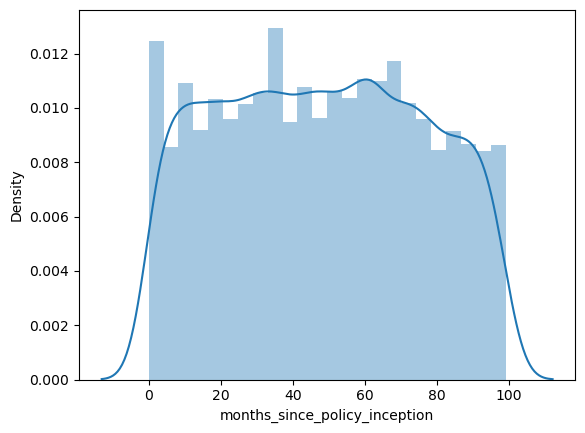

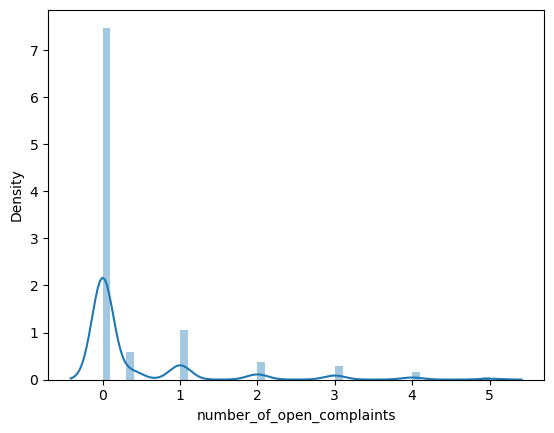

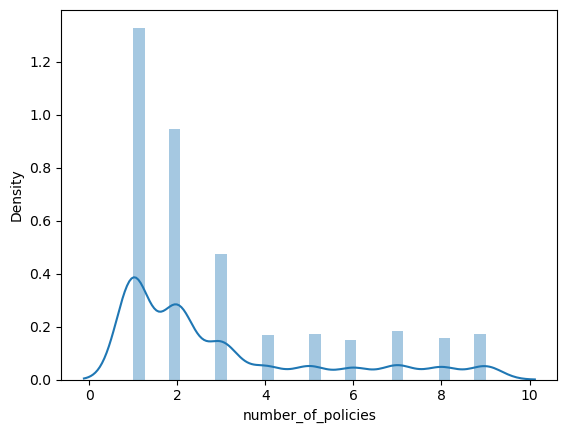

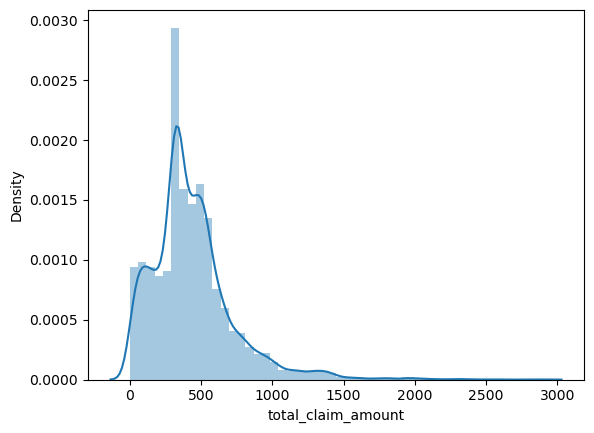

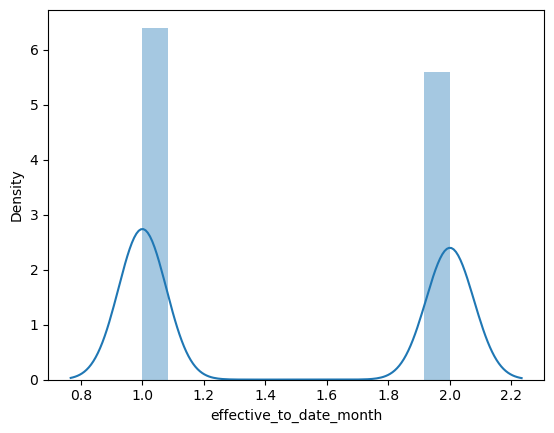

In [34]:
for column in numerical.columns:
    sns.distplot(df1[column])
    plt.show()

####    - Use Matplotlib to construct histograms

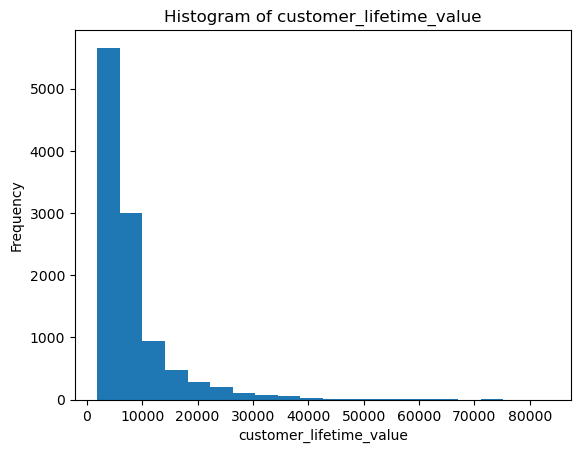

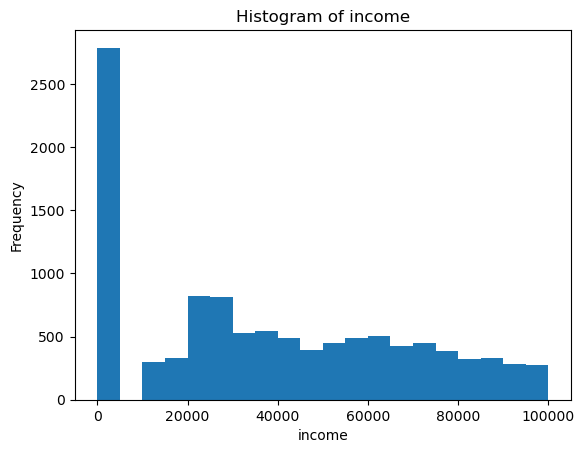

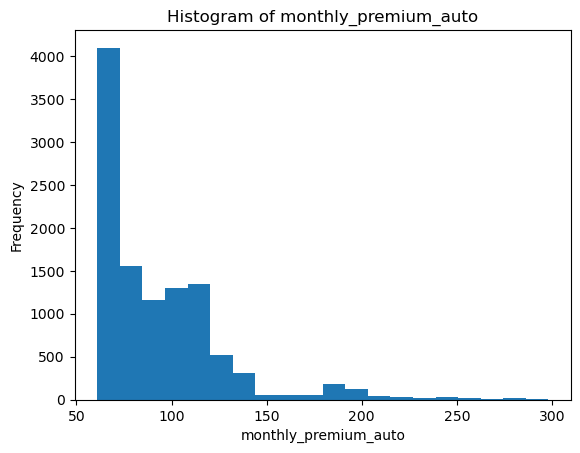

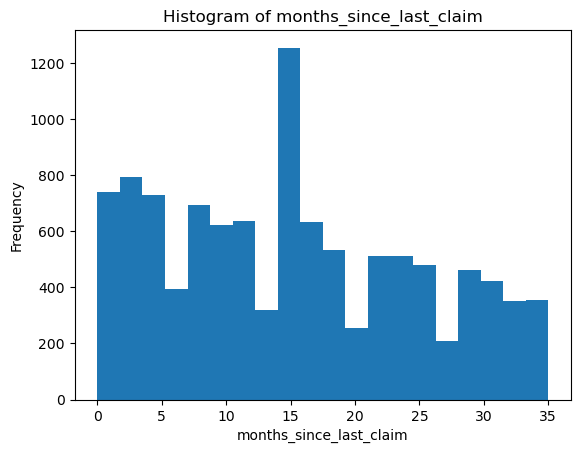

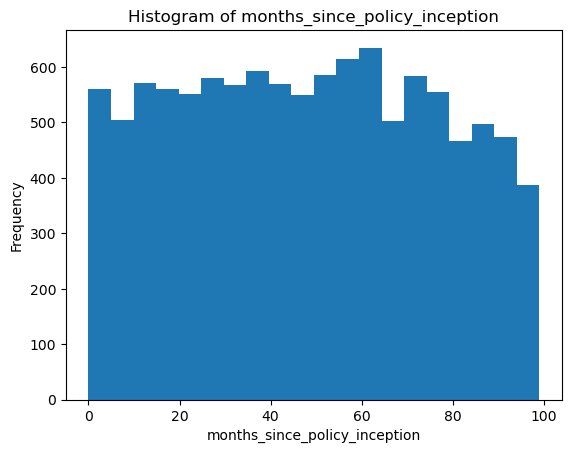

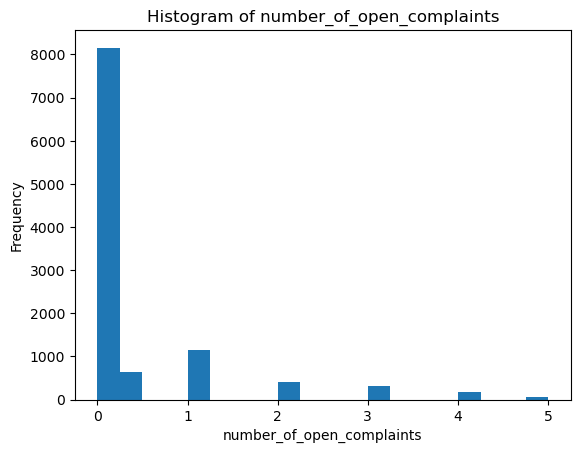

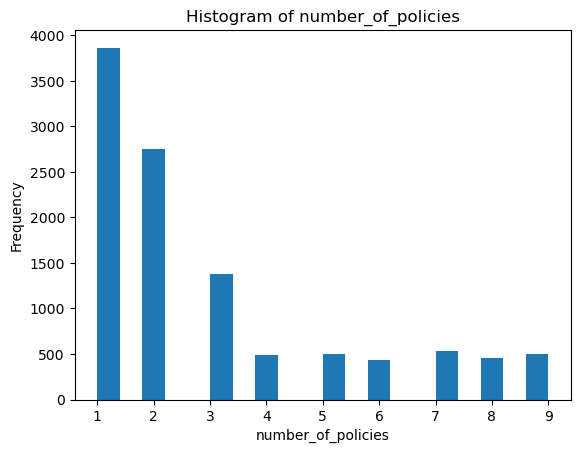

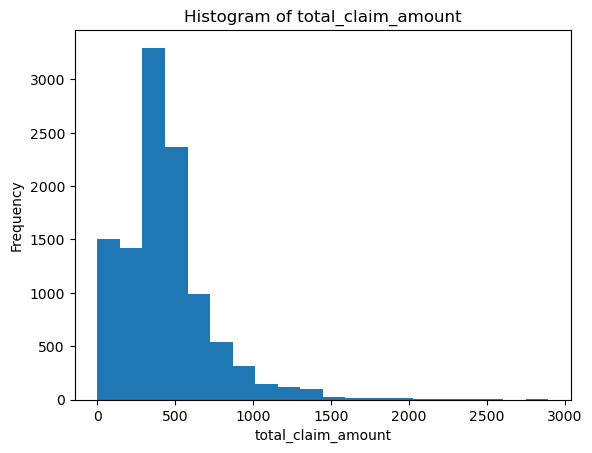

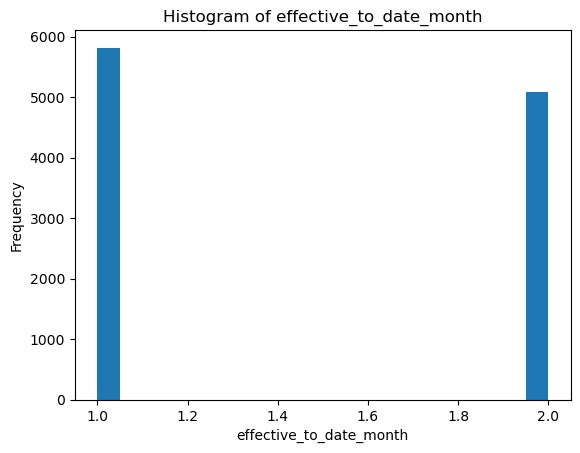

In [35]:
for column in numerical:
    plt.hist(numerical[column], bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

   #### - Do the distributions for different numerical variables look like a normal distribution?

Some of them do and some don't. For example, customer lifetime value, monthly premium auto look relatively close to a normal distribution, although they are very skewed to the left. On the other hand, effective to date month looks far from a normal distribution.

### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

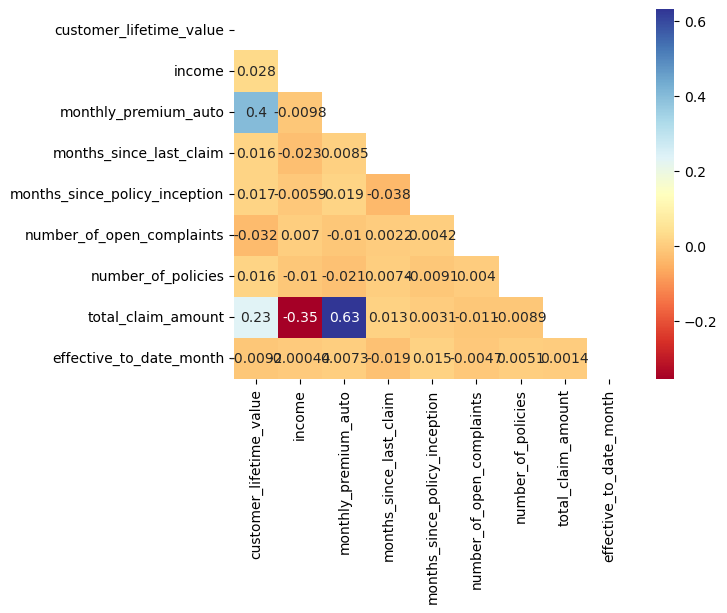

In [36]:
correlation = numerical.corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation, annot=True, mask=mask,cmap='RdYlBu')
plt.show()

Multicollinearity is very low across all independent variables. The highest correlation is 0.4 for monthly_premium_auto and customer_lifetime_value, but that's not enough to reduce the expanatory power of the variables.

### Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

No need to drop any features as explained above.

# Lab: Customer Analysis Round 5

### X-y split.

In [37]:
y = numerical['total_claim_amount']
x = numerical.drop(['total_claim_amount'], axis=1)

### Normalize (numerical)

In [87]:
transformer = MinMaxScaler().fit(x)
x_minmax = transformer.transform(x) 
print(x_minmax.shape)

(10910, 8)


In [88]:
x = pd.DataFrame(x_minmax,columns=x.columns)
x.head() 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_date_month
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.000000,1.000,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.000000,0.000,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.000000,0.125,1.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.000000,0.125,0.0
4,0.087527,0.236795,0.236287,0.432831,0.313131,0.076851,0.750,0.0


In [105]:
normalizer = Normalizer()
x_minmax_v2 = normalizer.transform(x)
print(x_minmax_v2.shape)

(10910, 8)


In [106]:
x2 = pd.DataFrame(x_minmax_v2,columns=x.columns)
x2.head() 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_date_month
0,0.022398,0.300948,0.000000,0.125296,0.329059,0.000000,0.626478,0.626478
1,0.014676,0.000000,0.045767,0.309908,0.949551,0.000000,0.000000,0.000000
2,0.109068,0.150695,0.111989,0.661104,0.213101,0.000000,0.085069,0.680548
3,0.384861,0.752803,0.232952,0.438171,0.046473,0.000000,0.191700,0.000000
4,0.088716,0.240013,0.239498,0.438713,0.317387,0.077896,0.760193,0.000000


# Lab: Customer Analysis Round 5

### One Hot/Label Encoding (categorical).

In [40]:
categorical

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,unknown
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,unknown
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,unknown
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [41]:
categorical.describe()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
count,10910,10910,10910,10910,10910,10910,10910,10910,10910,10910,10910,10910,10910,10910,10910,10910
unique,9134,6,3,3,5,5,2,3,3,3,9,4,4,7,4,2
top,ID89933,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize,unknown
freq,7,3552,8813,6660,3272,6789,5573,6902,6319,8128,4118,4483,4121,5212,7251,5482


In [42]:
categorical.nunique()

customer             9134
state                   6
response                3
coverage                3
education               5
employment_status       5
gender                  2
location_code           3
marital_status          3
policy_type             3
policy                  9
renew_offer_type        4
sales_channel           4
vehicle_class           7
vehicle_size            4
vehicle_type            2
dtype: int64

In [43]:
categorical = categorical.drop(columns=['customer'])
categorical.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,unknown
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,unknown
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,unknown


In [44]:
categorical = pd.get_dummies(categorical, drop_first=True)
categorical

,state_California,state_Nevada,state_Oregon,state_Washington,state_unknown,response_Yes,response_unknown,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_unknown,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_unknown,vehicle_type_unknown
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0
10906,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
10907,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
10908,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


### Concat DataFrames

In [107]:
X_concat = pd.concat([x, categorical], axis=1)
X_concat

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_date_month,state_California,state_Nevada,state_Oregon,state_Washington,state_unknown,response_Yes,response_unknown,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_unknown,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_unknown,vehicle_type_unknown
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.000000,1.000,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.000000,0.000,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.000000,0.125,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.000000,0.125,0.0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0.087527,0.236795,0.236287,0.432831,0.313131,0.076851,0.750,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.432831,0.404040,0.076851,0.750,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.000000,0.625,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.000000,0.125,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.800000,0.625,1.0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [108]:
X_concat_v2 = pd.concat([x2, categorical], axis=1)
X_concat_v2

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_date_month,state_California,state_Nevada,state_Oregon,state_Washington,state_unknown,response_Yes,response_unknown,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_unknown,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_unknown,vehicle_type_unknown
0,0.022398,0.300948,0.000000,0.125296,0.329059,0.000000,0.626478,0.626478,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0.014676,0.000000,0.045767,0.309908,0.949551,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.109068,0.150695,0.111989,0.661104,0.213101,0.000000,0.085069,0.680548,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,0.384861,0.752803,0.232952,0.438171,0.046473,0.000000,0.191700,0.000000,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0.088716,0.240013,0.239498,0.438713,0.317387,0.077896,0.760193,0.000000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.132532,0.000000,0.639769,0.341813,0.319077,0.060691,0.592286,0.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0
10906,0.036510,0.540894,0.014927,0.176885,0.607485,0.000000,0.552767,0.000000,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
10907,0.186400,0.274952,0.407631,0.216876,0.439129,0.000000,0.086258,0.690060,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
10908,0.075291,0.390747,0.249078,0.000000,0.165974,0.486857,0.380357,0.608572,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


### Train-test split.

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_concat, y, test_size=0.35, random_state=42)

In [110]:
X2_train, X2_test, y_train, y_test = train_test_split(X_concat_v2, y, test_size=0.35, random_state=42)

### Apply linear regression.

In [111]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [112]:
model2 = LinearRegression()
model2.fit(X2_train,y_train)

LinearRegression()

In [113]:
predictions = model.predict(X_test)
predictions.shape

(3819,)

In [114]:
predictions2 = model.predict(X2_test)
predictions.shape

(3819,)

In [115]:
predictions

array([388.28357595, 439.39209997, 562.01317144, ..., 522.76638652,
        24.52685132, 720.20978089])

In [116]:
predictions2

array([370.14587241, 488.66089879, 543.40485677, ..., 480.35757304,
        25.52946524, 706.42848511])

### Description

In [117]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE =", MAE)

r2 =  0.7745083981750758
RMSE =  136.54539610545584
MSE =  18644.645197595833
MAE = 95.08211845512676


In [118]:
r2_v2 = r2_score(y_test, predictions2)
RMSE_v2 = mean_squared_error(y_test, predictions2, squared=False)
MSE_v2 = mean_squared_error(y_test, predictions2)
MAE_v2 = mean_absolute_error(y_test, predictions2)
print("r2 = ", r2_v2)
print("RMSE = ", RMSE_v2)
print("MSE = ", MSE_v2)
print("MAE =", MAE_v2)

r2 =  0.7128804507161542
RMSE =  154.07893132332805
MSE =  23740.317077738844
MAE = 104.62980513021647


After trying different train test splits and different transformation methods (including MinMax scaler and Normalizer) we can see that the best results are achieved using MinMax scaler and a train test split of 0.35, with an R2 of 0.77. 